# Практическое задание 4

# Составные квадратурные формулы

In [1]:
import numpy as np
from scipy import linalg as LA
import math
import matplotlib.pyplot as plt

Веса для квадратурной формулы:

Для вычисления весов мы решаем систему, для которой вычислим значения в правой части:

$$\int\limits_{-1}^1 1dx = 1 - (-1) = 2$$

$$\int\limits_{-1}^1 x dx = 0$$

$$\int\limits_{-1}^1 x^2 dx = \dfrac{x^3}{3} \bigg|_{-1}^1 = \dfrac{2}{3}$$

$$\int\limits_{-1}^1 x^3 dx = 0$$

$$\int\limits_{-1}^1 x^4 dx = \dfrac{x^5}{5} \bigg|_{-1}^1 =  \dfrac{2}{5}$$

$ $

Если мы строим интерполяционный многочлен $L_n(x)$, то рассмотрим $I - S(f)$, где 

$$S(f) = c_1f(x_1) +  c_2f(x_2) +  c_3f(x_3) +  c_4f(x_4) +  c_5f(x_5)$$

In [2]:
nodes = [-1, -3/4, 0, 3/4, 1]

# матрица системы
A = np.zeros((5, 5))
for i in range(0, 5):
    for j in range(0, 5):
        A[i, j] = nodes[j] ** i

#print("A = ", A)

b = np.array([2, 0, 2/3, 0, 2/5])
c1, c2, c3, c4, c5 = np.linalg.solve(A, b)

print('Коэффициенты: ', c1, c2, c3, c4, c5)

Коэффициенты:  0.02857142857142858 0.5417989417989416 0.8592592592592598 0.5417989417989414 0.028571428571428723


Второй способ: коэффициенты считаются по формулам:

$$c_m = \int\limits_{-1}^1 \prod\limits_{k = 1, k \neq m} ^ n \dfrac{x - x_k}{x_m - x_k} dx $$

$$c_1 = \int\limits_{-1}^1 \dfrac{(x+\frac{3}{4})x(x-\frac{3}{4})(x-1)}{-\frac{1}{4} \cdot (-1) \cdot (-\frac{7}{4}) \cdot (-2)} dx = \frac{8}{7} \cdot \frac{1}{40} = \frac{1}{35} = 0.02857143$$

$$c_2 = \int\limits_{-1}^1 \dfrac{(x+1)x(x-\frac{3}{4})(x-1)}{\frac{1}{4} \cdot (-\frac{3}{4}) \cdot (-\frac{6}{4}) \cdot (-\frac{7}{4})} dx = - \frac{128}{63} \cdot (-\frac{4}{15}) = \frac{512}{945} = 0.54179894$$

Аналогично:

$$c_3 = 0.8592592$$

$$c_4 = 0.5417989$$

$$c_5 = 0.02857143$$

In [145]:
def count_integral_on_interval(f, x0, x1):
    h34 = (x1-x0) / 8
    integral = c1*f(x0) + c2*f(x0+h34) + c3*f((x1+x0)/2) + c4*f(x1-h34) + c5*f(x1)
    return integral

In [146]:
def count_integral(f, a, b, N):
    h = (b-a)/2/(N-1)
    xes = np.array(np.linspace(a, b, N))
    integral = 0
    for i in range(1, xes.shape[0] - 1):
        integral += h*count_integral_on_interval(f, xes[i], xes[i+1])
        #integral += h * (c1*f(xes[i-1]) + c2*f(xes[i]-0.75*h) + c3*f(xes[i]) + c4*f(xes[i]+0.75*h) + c5*f(xes[i+1]))
    return integral

In [147]:
def count_runge_error(f, a, b, N):
    S1 = count_integral(f, a, b, N)
    S2 = count_integral(f, a, b, 2*N)
    # точность = 5 - 1
    # порядок k = точность + 1
    k = 5
    eps = (abs(S2 - S1)) / (2**k-1)
    return eps

In [148]:
def count_square_formula(f, a, b, tol):
    integral = 0
    N = 2
    cur_tol = 20 * tol
    
    while(cur_tol > tol):
        integral = count_integral(f, a, b, N)
        cur_tol = count_runge_error(f, a, b, N)
        N *= 2
        
    return integral, N

### Гладкая функция 1

Рассмотрим на отрезке $[0,1]$.

In [160]:
def func_1(x):
    return np.sin(x)

In [161]:
ntols = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12]

In [162]:
myNs = []

for my_tol in ntols:
    cur_int, cur_n = count_square_formula(func_1, 0, 1, my_tol)
    myNs.append(cur_n)
    print('tol = ', my_tol)
    print('integral = ', cur_int)
    print('N = ', cur_n)
    print('---------------------------')

tol =  0.1
integral =  0
N =  4
---------------------------
tol =  0.01
integral =  0.4046546406625352
N =  8
---------------------------
tol =  0.001
integral =  0.449510954579957
N =  16
---------------------------
tol =  0.0001
integral =  0.4574762948329982
N =  32
---------------------------
tol =  1e-05
integral =  0.45957172046039085
N =  128
---------------------------
tol =  1e-06
integral =  0.4596666942300273
N =  256
---------------------------
tol =  1e-07
integral =  0.45969577931137323
N =  1024
---------------------------
tol =  1e-08
integral =  0.459697574806073
N =  4096
---------------------------
tol =  1e-09
integral =  0.4596976643149807
N =  8192
---------------------------
tol =  1e-10
integral =  0.45969769226898666
N =  32768
---------------------------
tol =  1e-11
integral =  0.45969769401544136
N =  131072
---------------------------
tol =  1e-12
integral =  0.4596976941027571
N =  262144
---------------------------


Построим теперь график зависимости:

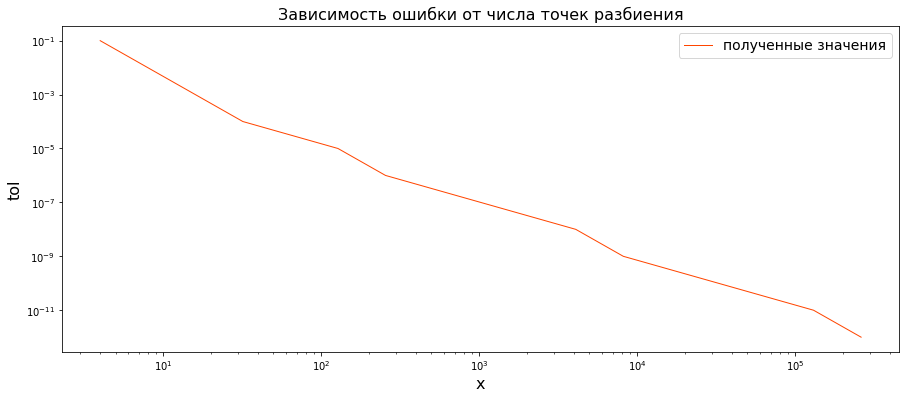

In [163]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)
plt.plot(myNs, ntols, color = 'orangered', label = "полученные значения", linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('tol', fontsize=16)
plt.title("Зависимость ошибки от числа точек разбиения", fontsize=16)
plt.legend(fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

Как мы видим, у нас линейный порядок убывания на графике с логарифмической шкалой (есть небольшие скачки, так как вычисляем мы N не совсем точно, сгущая сетку каждый раз в два раза). Это правильно, так как в теории зависимость имеет вид:

$\epsilon = \dfrac{C_1}{N^{C_2}}$

То есть $ln(\epsilon \cdot N^{C_2}) = ln(\epsilon) + C_2ln(N) = ln(C_1) = const$ - то есть это линейная функция. 

### Гладкая фунция 2

Рассмотрим отрезок $[-2, 2]$.

In [169]:
def func_2(x):
    return np.sin(x) + x**2 + np.cos(x)

In [176]:
ntols2 = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7]

In [177]:
myNs2 = []

for my_tol in ntols2:
    cur_int, cur_n = count_square_formula(func_2, -2, 2, my_tol)
    myNs2.append(cur_n)
    print('tol = ', my_tol)
    print('integral = ', cur_int)
    print('N = ', cur_n)
    print('---------------------------')

tol =  0.1
integral =  5.495139753618348
N =  8
---------------------------
tol =  0.01
integral =  6.553009787008357
N =  32
---------------------------
tol =  0.001
integral =  7.11040367982506
N =  512
---------------------------
tol =  0.0001
integral =  7.146708584596497
N =  4096
---------------------------
tol =  1e-05
integral =  7.151601719295026
N =  65536
---------------------------
tol =  1e-06
integral =  7.151887376755509
N =  524288
---------------------------
tol =  1e-07
integral =  7.151923085678636
N =  4194304
---------------------------


Теперь построим график зависимости:

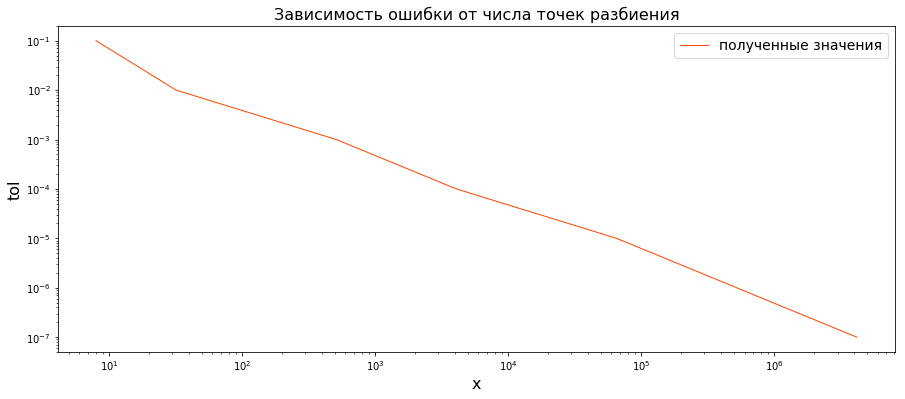

In [178]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)
plt.plot(myNs2, ntols2, color = 'orangered', label = "полученные значения", linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('tol', fontsize=16)
plt.title("Зависимость ошибки от числа точек разбиения", fontsize=16)
plt.legend(fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

И снова видим практически линейную зависимость.

### Гладкая фунция 3

Рассмотрим отрезок $[0, 3]$.

In [179]:
def func_2(x):
    return x*np.sin(x)

In [180]:
ntols3 = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7]

In [181]:
myNs3 = []

for my_tol in ntols3:
    cur_int, cur_n = count_square_formula(func_2, -2, 2, my_tol)
    myNs3.append(cur_n)
    print('tol = ', my_tol)
    print('integral = ', cur_int)
    print('N = ', cur_n)
    print('---------------------------')

tol =  0.1
integral =  0
N =  4
---------------------------
tol =  0.01
integral =  3.0089029891559766
N =  32
---------------------------
tol =  0.001
integral =  3.4259555412204485
N =  256
---------------------------
tol =  0.0001
integral =  3.479628671883924
N =  4096
---------------------------
tol =  1e-05
integral =  3.482738182156515
N =  32768
---------------------------
tol =  1e-06
integral =  3.483126700341856
N =  262144
---------------------------
tol =  1e-07
integral =  3.4831787311440414
N =  4194304
---------------------------


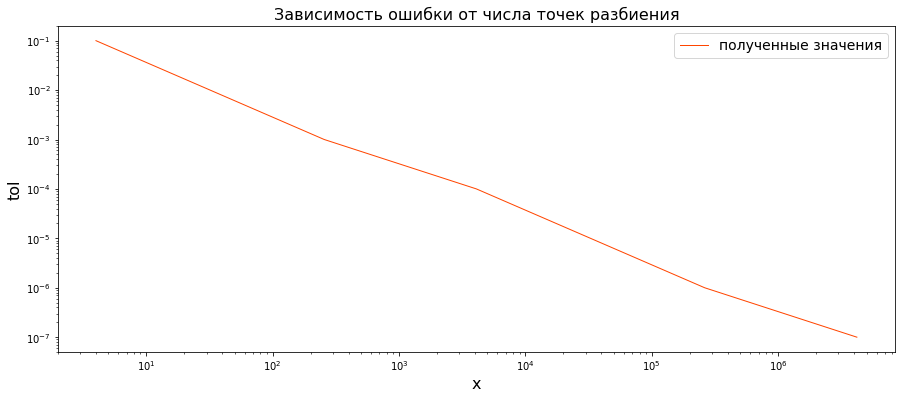

In [182]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)
plt.plot(myNs3, ntols3, color = 'orangered', label = "полученные значения", linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('tol', fontsize=16)
plt.title("Зависимость ошибки от числа точек разбиения", fontsize=16)
plt.legend(fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

И вновь, видим практически линейную зависимоть (опять же, если бы мы считали N точнее, то результат получился бы более ровный).

**Вывод:** порядок убывания ошибки (продемонстрированный на логарифмической сетке) совпадает с теоретической оценкой.